                                              Review  \
0  The product arrived on time. Packaging was gre...   
1           THIS PRODUCT IS JUST AMAZING! I LOVE IT.   
2  I bought this phone for $799, and it has a 120...   
3  Wow!!! This product is awesome... but a bit ex...   
4                The laptop works perfectly fine.      

                                          lowercased  \
0  the product arrived on time. packaging was gre...   
1           this product is just amazing! i love it.   
2  i bought this phone for $799, and it has a 120...   
3  wow!!! this product is awesome... but a bit ex...   
4                the laptop works perfectly fine.      

                                        urls_removed  \
0  the product arrived on time. packaging was gre...   
1           this product is just amazing! i love it.   
2  i bought this phone for $799, and it has a 120...   
3  wow!!! this product is awesome... but a bit ex...   
4                the laptop works perfectly fi

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


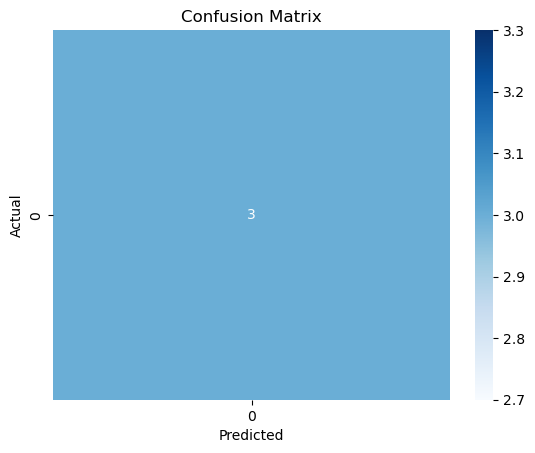

In [3]:
import pandas as pd

# Load the CSV file that contains preprocessed reviews and their labels
df = pd.read_csv('Processed_Reviews.csv')
print(df.head())

# Extract the text data (from the 'lemmatized' column) and the target labels
X_text = df['lemmatized']
y = df['label']

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the text reviews into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier and train it with the training data
clf = MultinomialNB()
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Print detailed performance results like precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Show the overall accuracy of the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Create and display the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
